In [1]:
import numpy as np
import seaborn as sns

color=sns.color_palette()
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (20,10) #runtime parameters


In [2]:
df1=pd.read_csv('Bengaluru_House_Data.csv')
df1

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df2=df1.drop(['area_type','availability','society','balcony'],axis='columns')

In [5]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\user\AppData\Local\Temp\ipykernel_4880\2989175054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [10]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [11]:
df4=df3.drop(['size'],axis='columns')
df4.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [12]:
len(df4['location'].unique())

1304

In [13]:
df4['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [15]:
df4[~df4['total_sqft'].apply(is_float)]

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...
12975,Whitefield,850 - 1060,2.0,38.190,2
12990,Talaghattapura,1804 - 2273,3.0,122.000,3
13059,Harlur,1200 - 1470,2.0,72.760,2
13265,Hoodi,1133 - 1384,2.0,59.135,2


In [16]:
def avg(x):
    tokens=x.split('-')
    if(len(tokens)==2):
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [17]:
avg('12-3')

7.5

In [18]:
df5=df4.copy()
df5['total_sqft']=df4['total_sqft'].apply(avg)
df5.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [19]:
df5['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [20]:
df5.loc[30]

location      Yelahanka
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [21]:
df6=df5.copy()
df6['price_per_sq']=df5['price']*100000/df5['total_sqft']

In [22]:
df6.head()

,location,total_sqft,bath,price,bhk,price_per_sq
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [23]:
df6['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [24]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [25]:
few_location=location_stats[location_stats<=10]
few_location

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [26]:
df6.location=df6.location.apply(lambda x : 'others' if x in few_location else x)
len(df6.location.unique())

283

In [27]:
df6.head(20)

,location,total_sqft,bath,price,bhk,price_per_sq
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
9,others,1020.0,6.0,370.00,6,36274.509804


In [28]:
df7=df6[~(df5.total_sqft/df5.bhk<300)]
df7.shape

(12502, 6)

In [29]:
df7.price_per_sq.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sq, dtype: float64

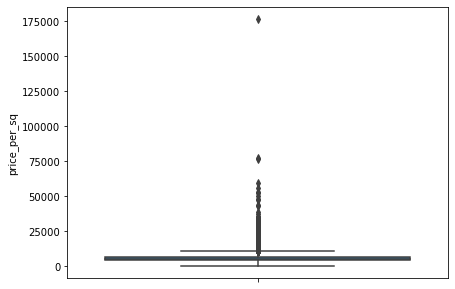

In [30]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(y=df7['price_per_sq'])
plt.show()

In [31]:
q1,q2=df7['price_per_sq'].quantile([.25,.75])
IQR=q2-q1
ll=q1-1.5*(IQR)
ul=q1+1.5*(IQR)

In [32]:
ul

8269.736842105263

In [33]:
ll

151.3157894736828

In [34]:
df8=df7[df7['price_per_sq']<ul]


In [35]:
df8.price_per_sq.describe()

count    10591.000000
mean      5086.826946
std       1368.901337
min        267.829813
25%       4035.087719
50%       4975.893599
75%       6030.316864
max       8267.716535
Name: price_per_sq, dtype: float64

In [36]:
df8.shape

(10591, 6)

In [37]:
df8.bhk.describe()

count    10591.000000
mean         2.524596
std          0.885266
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: bhk, dtype: float64

In [38]:
df8.bhk.describe()

count    10591.000000
mean         2.524596
std          0.885266
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: bhk, dtype: float64

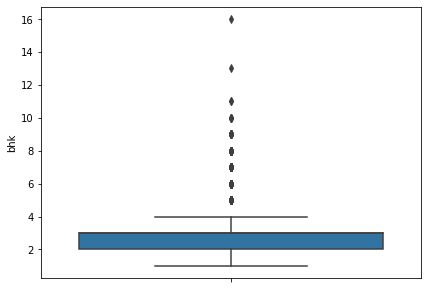

In [39]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(y=df7['bhk'])
plt.show()

In [40]:
q1,q2=df7['bhk'].quantile([.25,.75])
IQR=q2-q1
ll=q1-1.5*(IQR)
ul=q1+1.5*(IQR)

In [41]:
ul

3.5

In [42]:
df9=df8[df8['bhk']<ul]
df9.bhk.describe()


count    9772.000000
mean        2.354175
std         0.586513
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: bhk, dtype: float64

In [43]:
df9.shape

(9772, 6)

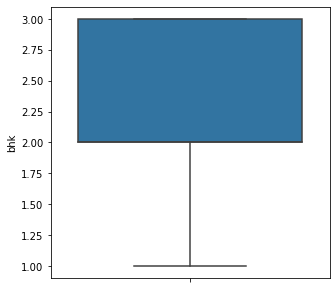

In [44]:
plt.figure(figsize=(5,5))

sns.boxplot(y=df9['bhk'])
plt.show()

In [45]:
df8.head(10)

,location,total_sqft,bath,price,bhk,price_per_sq
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
10,Whitefield,1800.0,2.0,70.00,3,3888.888889
12,7th Phase JP Nagar,1000.0,2.0,38.00,2,3800.000000


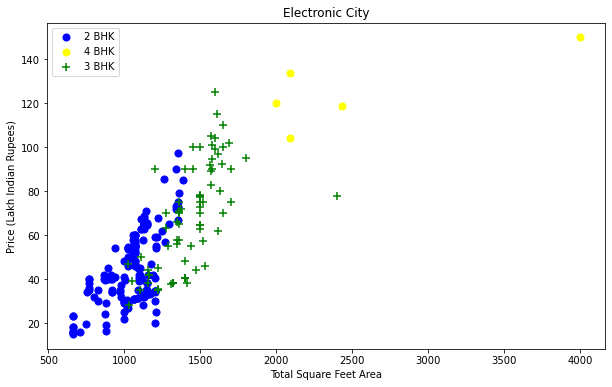

In [46]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    bhk4 = df[(df.location==location) & (df.bhk==4)]
    matplotlib.rcParams['figure.figsize'] = (10,6)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk4.total_sqft,bhk4.price,color='yellow',label='4 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df8,"Electronic City")

Text(0, 0.5, 'Count')

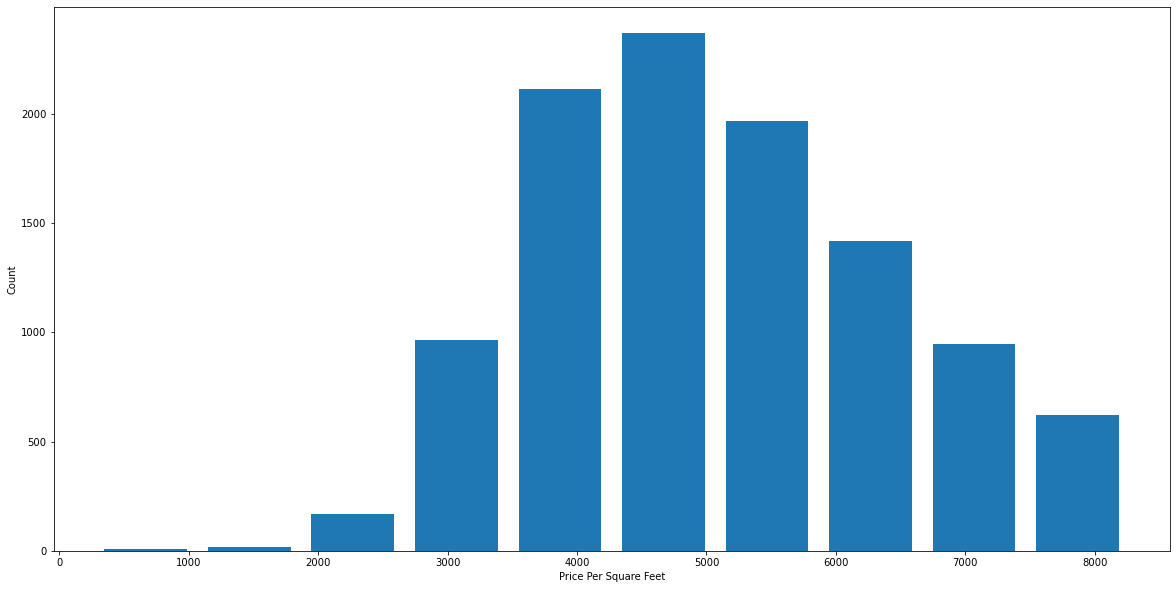

In [47]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sq,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [48]:
df8.bath.unique()

array([ 2.,  5.,  3.,  4.,  1.,  8.,  6.,  7.,  9., 12., 16., 10., 13.])

Text(0, 0.5, 'count')

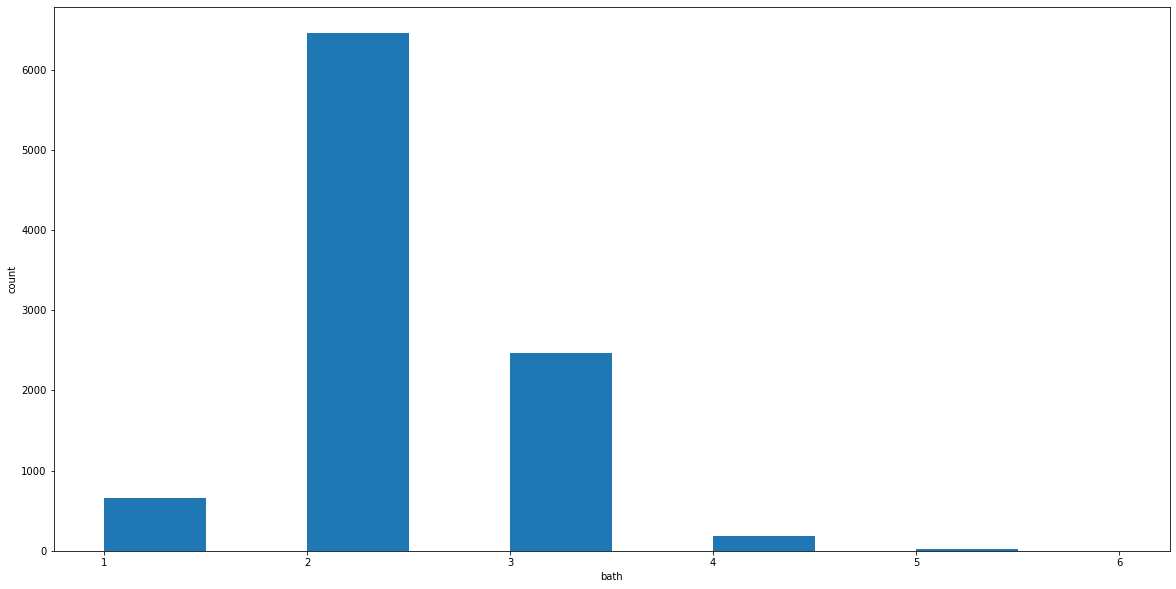

In [49]:
plt.hist(df9.bath,rwidth=1.8)
plt.xlabel('bath')
plt.ylabel('count')

In [50]:
df9[df9.bath>6]

,location,total_sqft,bath,price,bhk,price_per_sq


In [51]:
df9.bath.describe()

count    9772.000000
mean        2.228101
std         0.599232
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: bath, dtype: float64

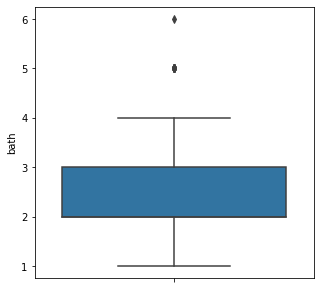

In [52]:
plt.figure(figsize=(5,5))
sns.boxplot(y=df9['bath'])
plt.show()

In [53]:
df9[df9.bhk>df9.bath+2]

,location,total_sqft,bath,price,bhk,price_per_sq


In [54]:
df9.bhk.describe()

count    9772.000000
mean        2.354175
std         0.586513
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: bhk, dtype: float64

In [55]:
df9.bhk==3

0        False
2         True
3         True
4        False
5        False
         ...  
13312    False
13313     True
13314     True
13317    False
13319    False
Name: bhk, Length: 9772, dtype: bool

In [56]:
row_13313 = df9.loc[3]
print(row_13313)

location        Lingadheeranahalli
total_sqft                  1521.0
bath                           3.0
price                         95.0
bhk                              3
price_per_sq           6245.890861
Name: 3, dtype: object


In [57]:
dummies=pd.get_dummies(df9.location)
dummies.head()

,Anekal,Banaswadi,Basavangudi,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,Rachenahalli,Sector 1 HSR Layout,Thanisandra,...,"Whietfield,",Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,"Yemlur, Old Airport Road,",Yeshwanthpur,others
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [58]:
df10 = pd.concat([df9, dummies], axis='columns')
df10.head()


,location,total_sqft,bath,price,bhk,price_per_sq,Anekal,Banaswadi,Basavangudi,Devarabeesana Halli,...,"Whietfield,",Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,"Yemlur, Old Airport Road,",Yeshwanthpur,others
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kothanur,1200.0,2.0,51.00,2,4250.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Whitefield,1170.0,2.0,38.00,2,3247.863248,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [59]:
df11=df10.drop('location',axis='columns')
df11.head

<bound method NDFrame.head of        total_sqft  bath   price  bhk  price_per_sq   Anekal   Banaswadi  \
0          1056.0   2.0   39.07    2   3699.810606        0           0   
2          1440.0   2.0   62.00    3   4305.555556        0           0   
3          1521.0   3.0   95.00    3   6245.890861        0           0   
4          1200.0   2.0   51.00    2   4250.000000        0           0   
5          1170.0   2.0   38.00    2   3247.863248        0           0   
...           ...   ...     ...  ...           ...      ...         ...   
13312      1262.0   2.0   47.00    2   3724.247227        0           0   
13313      1345.0   2.0   57.00    3   4237.918216        0           0   
13314      1715.0   3.0  112.00    3   6530.612245        0           0   
13317      1141.0   2.0   60.00    2   5258.545136        0           0   
13319       550.0   1.0   17.00    1   3090.909091        0           0   

        Basavangudi   Devarabeesana Halli   Devarachikkanahalli  ... 

In [60]:
x=df11.drop('price',axis='columns')
x.head()

,total_sqft,bath,bhk,price_per_sq,Anekal,Banaswadi,Basavangudi,Devarabeesana Halli,Devarachikkanahalli,Electronic City,...,"Whietfield,",Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,"Yemlur, Old Airport Road,",Yeshwanthpur,others
0,1056.0,2.0,2,3699.810606,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3,4305.555556,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,3,6245.890861,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,2,4250.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1170.0,2.0,2,3247.863248,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [61]:
y=df11.price
y.head()

0    39.07
2    62.00
3    95.00
4    51.00
5    38.00
Name: price, dtype: float64

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [63]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [64]:
lr.fit(x_train,y_train)

LinearRegression()

In [65]:
lr.score(x_test,y_test)

0.8071880924269443

In [66]:
y_pred=lr.predict(x_test)


In [67]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

226.0601568006454